In [1]:
import time
import datetime
import tqdm
import random
import numpy as np
import matplotlib.pyplot as plt

import vent
from vent import io

2020-09-03 14:40:30,896 - vent.common.prefs - INFO - Loaded prefs from /home/pi/vent/prefs.json
2020-09-03 14:40:30,902 - vent.common.prefs - INFO - Saved prefs to /home/pi/vent/prefs.json


In [2]:
hal = io.Hal("../vent/io/config/devices.ini")

  [         adc         ]  opts: {'address': 72, 'i2c_bus': 1}
  [     inlet_valve     ]  opts: {'form': 'Normally Closed'}
  [    control_valve    ]  opts: {'pin': 12, 'form': 'Normally Closed', 'response': '/home/pi/src/vent/vent/io/config/calibration/SMC_PVQ31_5G_23_01N_response'}
  [  expiratory_valve   ]  opts: {'pin': 27, 'form': 'Normally Closed'}
  [   pressure_sensor   ]  opts: {'MUX': 0, 'output_span': 2.0, 'adc': <vent.io.devices.base.ADS1015 object at 0xab326f90>, 'offset_voltage': 2.25, 'conversion_factor': 70.3}
  [    oxygen_sensor    ]  opts: {'MUX': 3, 'output_span': 2.0, 'adc': <vent.io.devices.base.ADS1015 object at 0xab326f90>, 'offset_voltage': 2.2, 'conversion_factor': 70.3}
  [   flow_sensor_ex    ]  opts: {'MUX': 1, 'output_span': 4.0, 'adc': <vent.io.devices.base.ADS1015 object at 0xab326f90>, 'offset_voltage': 2.25, 'conversion_factor': 1}


In [11]:
xs = []
raws = []
setpoints = []
ts = []

hal.setpoint_ex = 1
hal.setpoint_in = 100

for i in tqdm.tqdm(range(50)):
    setpoints.append(hal.setpoint_in)
    raw = hal._pressure_sensor._raw_read()
    x = hal._pressure_sensor._convert(raw)
    xs.append(x)
    raws.append(raw)
    ts.append(datetime.datetime.now().timestamp())
    time.sleep(0.1)

hal.setpoint_in = 0
hal.setpoint_ex = 0
ts, xs = np.array(ts), np.array(xs)

100%|██████████| 50/50 [00:05<00:00,  9.56it/s]


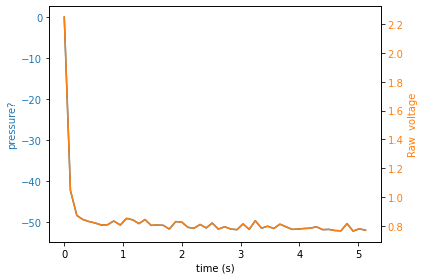

In [12]:
ts = ts - min(ts)

fig, ax1 = plt.subplots()

ax1.set_xlabel("time (s)")
ax1.set_ylabel("pressure?", color="tab:blue")
ax1.plot(ts, xs, color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()

ax2.set_ylabel("Raw  voltage", color="tab:orange")
ax2.plot(ts, raws, color="tab:orange")
ax2.tick_params(axis="y", labelcolor="tab:orange")

fig.tight_layout()
plt.show()

In [9]:
xs = []
raws = []
setpoints = []
ts = []

hal.setpoint_ex = 1
hal.setpoint_in = 0

for i in tqdm.tqdm(range(11*40)):
    if i % 40 == 0 and i != 0:
        hal.setpoint_in += 10
    setpoints.append(hal.setpoint_in)
    raw = hal._pressure_sensor._raw_read()
    xs.append(hal._pressure_sensor._convert(raw))
    raws.append(raw)
    ts.append(datetime.datetime.now().timestamp())
    time.sleep(0.1)

hal.setpoint_in = 0
hal.setpoint_ex = 0
ts, xs = np.array(ts), np.array(xs)

100%|██████████| 440/440 [00:46<00:00,  9.52it/s]


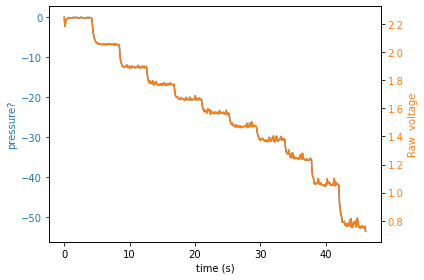

In [10]:
ts = ts - min(ts)

fig, ax1 = plt.subplots()

ax1.set_xlabel("time (s)")
ax1.set_ylabel("pressure?", color="tab:blue")
ax1.plot(ts, xs, color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()

ax2.set_ylabel("Raw  voltage", color="tab:orange")
ax2.plot(ts, raws, color="tab:orange")
ax2.tick_params(axis="y", labelcolor="tab:orange")

fig.tight_layout()
plt.show()

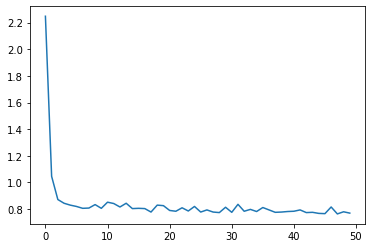

In [14]:
plt.plot(raws)

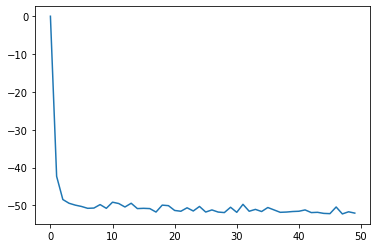

In [16]:
plt.plot(70.3 * (np.array(raws) - 2.25) / 2.0)